# Data Exploring
This section is for exploring the datasets and clean the datasets before loading to the database for better organizing the data.

In [207]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# Importing the dataset
products = pd.read_csv('../data/raw/products.csv')
transactions = pd.read_csv('../data/raw/transactions.csv')
users = pd.read_csv('../data/raw/users.csv')

## Explore and Clean Users

In [3]:
# Check users
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [4]:
# Check users info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [5]:
# Remove " Z" from end of date
users['CREATED_DATE'] = users['CREATED_DATE'].str.replace(' Z', '')
users['BIRTH_DATE'] = users['BIRTH_DATE'].str.replace(' Z', '')

# Convert to datetime
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'])
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'])

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            100000 non-null  object        
 1   CREATED_DATE  100000 non-null  datetime64[ns]
 2   BIRTH_DATE    96325 non-null   datetime64[ns]
 3   STATE         95188 non-null   object        
 4   LANGUAGE      69492 non-null   object        
 5   GENDER        94108 non-null   object        
dtypes: datetime64[ns](2), object(4)
memory usage: 4.6+ MB


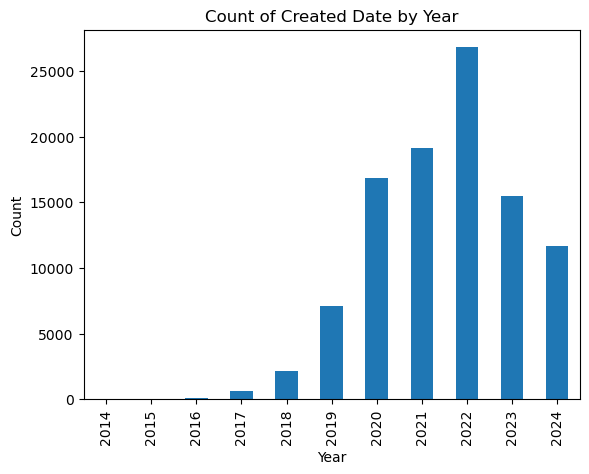

In [6]:
# Plot count of created_date by year
users['CREATED_DATE'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Created Date by Year')
plt.show()

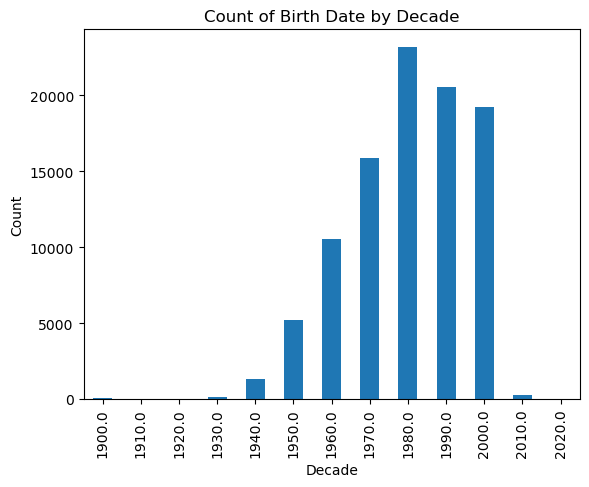

In [7]:
# Plot count of birth_date by every 10 year
users['DECADE'] = (users['BIRTH_DATE'].dt.year // 10) * 10
users['DECADE'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Count of Birth Date by Decade')
plt.show()

In [8]:
# Remove decade column
users.drop(columns=['DECADE'], inplace=True)

In [9]:
# Print out the range of birth_date
print("The range of users' birthdates are: (" + str(users['BIRTH_DATE'].min()) + ", " + str(users['BIRTH_DATE'].max()) + ")")

The range of users' birthdates are: (1900-01-01 00:00:00, 2022-04-03 07:00:00)


In [10]:
# Change "NaN" or "nan" to np.nan
users = users.replace('NaN', np.nan)
users = users.replace('nan', np.nan)

# Check for missing values
users.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [11]:
# Check for duplicates
users.duplicated().sum()

0

In [12]:
# Check duplicated id in users
users['ID'].duplicated().sum()

0

In [13]:
# Check null values in id
users['ID'].isnull().sum()

0

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            100000 non-null  object        
 1   CREATED_DATE  100000 non-null  datetime64[ns]
 2   BIRTH_DATE    96325 non-null   datetime64[ns]
 3   STATE         95188 non-null   object        
 4   LANGUAGE      69492 non-null   object        
 5   GENDER        94108 non-null   object        
dtypes: datetime64[ns](2), object(4)
memory usage: 4.6+ MB


In [15]:
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54,2000-08-11 00:00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55,2001-09-24 04:00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18,1994-10-28 00:00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22,NaT,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50,1972-03-19 00:00:00,PA,en,female


In [16]:
# Check for uniqueness in ID
users['ID'].nunique()

100000

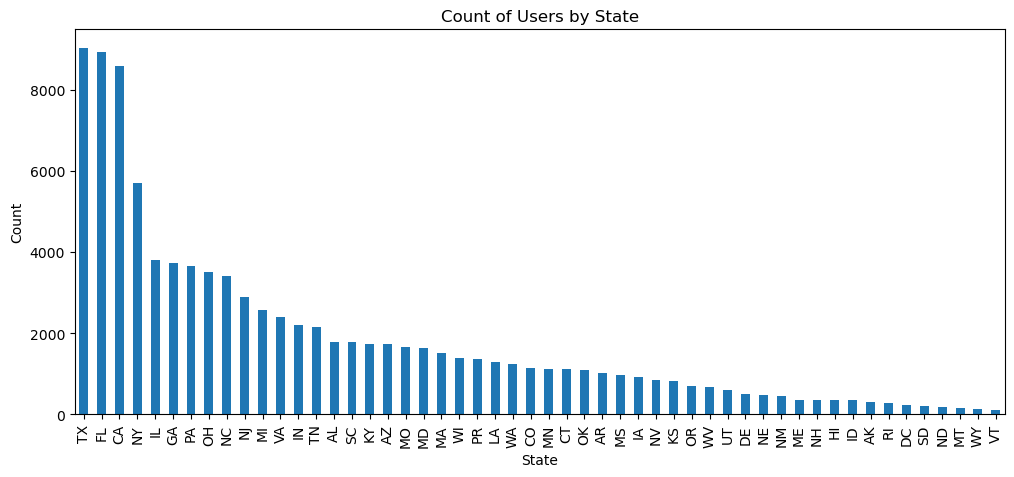

In [17]:
# Plot count of users by state
plt.figure(figsize=(12, 5))
users['STATE'].value_counts().plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Users by State')
plt.show()

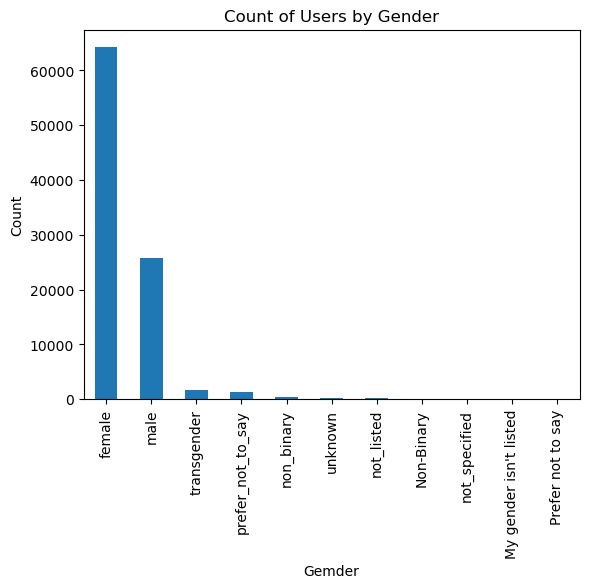

In [19]:
# Plot count of users by gender
users['GENDER'].value_counts().plot(kind='bar')
plt.xlabel('Gemder')
plt.ylabel('Count')
plt.title('Count of Users by Gender')
plt.show()

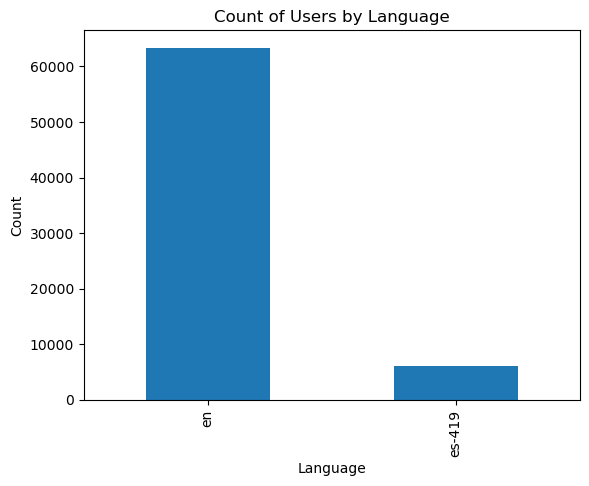

In [20]:
# Plot count of users by language
users['LANGUAGE'].value_counts().plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Count of Users by Language')
plt.show()

In [21]:
users = users.fillna('') # Fill null values with empty string to fit SQLite3 database data type

In [22]:
# Save to users_cleaned.csv
users.to_csv('../data/processed/users_cleaned.csv', index=False, header=True)

## Explore products

In [127]:
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [128]:
# Checking the data
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [129]:
# Change data type of barcode to string
products['BARCODE'] = products['BARCODE'].astype(str)

# Checking the data
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    845441 non-null  object
 1   CATEGORY_2    844128 non-null  object
 2   CATEGORY_3    784986 non-null  object
 3   CATEGORY_4    67459 non-null   object
 4   MANUFACTURER  619078 non-null  object
 5   BRAND         619080 non-null  object
 6   BARCODE       845552 non-null  object
dtypes: object(7)
memory usage: 45.2+ MB


In [130]:
# Checking the shape of the data
products.shape

(845552, 7)

In [131]:
# Check for duplicates
products.duplicated().sum()

215

In [132]:
# Strip the leading and trailing spaces for all columns
products = products.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Change all value as "nan" or "NaN" to null
products = products.replace(['nan', 'NaN', ''], np.nan)

# Remove duplicates
products = products.drop_duplicates()

# Checking the data
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    845226 non-null  object
 1   CATEGORY_2    843915 non-null  object
 2   CATEGORY_3    784774 non-null  object
 3   CATEGORY_4    67453 non-null   object
 4   MANUFACTURER  618873 non-null  object
 5   BRAND         618875 non-null  object
 6   BARCODE       841369 non-null  object
dtypes: object(7)
memory usage: 51.6+ MB


In [133]:
# Check the shape of products
products.shape

(845337, 7)

In [134]:
# Descriptive statistics
products.describe()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
count,845226,843915,784774,67453,618873,618875,841369
unique,27,121,344,127,4354,8122,841342
top,Health & Wellness,Candy,Confection Candy,Lip Balms,PLACEHOLDER MANUFACTURER,REM BRAND,40111216.0
freq,512686,120898,56951,9737,86900,20813,2


In [135]:
# Checking for missing values
products.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1422
CATEGORY_3       60563
CATEGORY_4      777884
MANUFACTURER    226464
BRAND           226462
BARCODE           3968
dtype: int64

In [136]:
# Checking for uniqueness of each column
products.nunique()

CATEGORY_1          27
CATEGORY_2         121
CATEGORY_3         344
CATEGORY_4         127
MANUFACTURER      4354
BRAND             8122
BARCODE         841342
dtype: int64

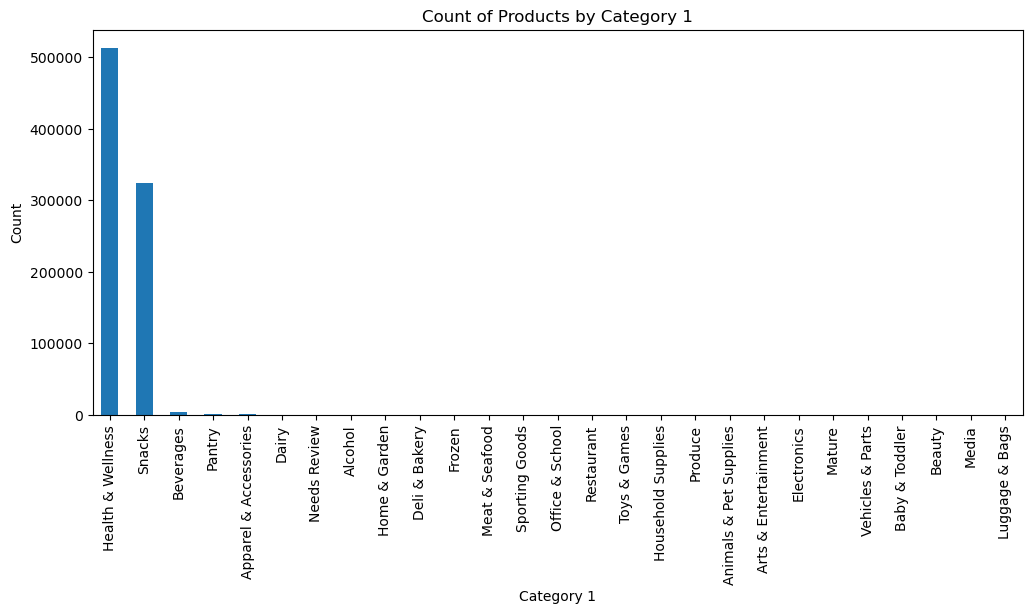

In [137]:
# Plot count of products by category_1
plt.figure(figsize=(12, 5))
products['CATEGORY_1'].value_counts().plot(kind='bar')
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Count of Products by Category 1')
plt.show()

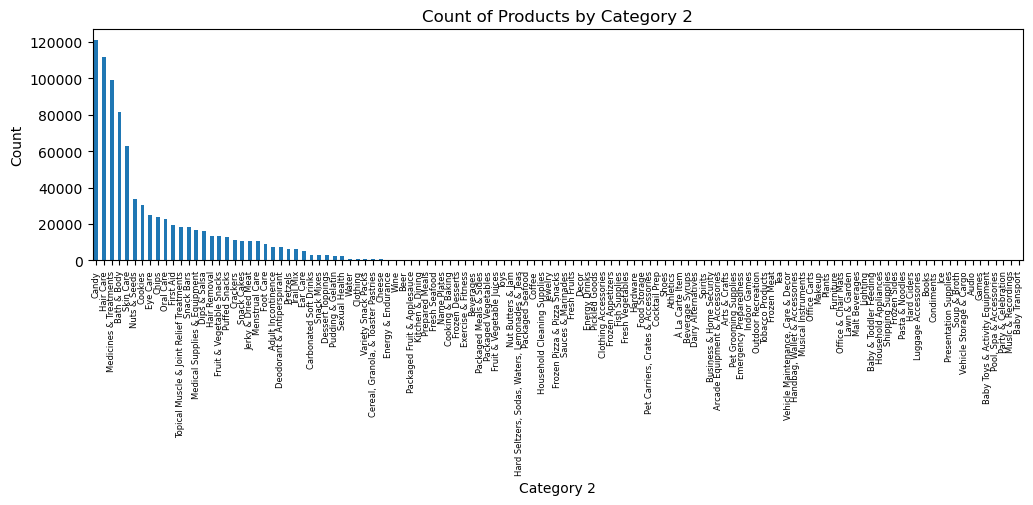

In [138]:
# Plot count of products by category_2
plt.figure(figsize=(12, 3))
products['CATEGORY_2'].value_counts().plot(kind='bar')
plt.xlabel('Category 2')
plt.ylabel('Count')
plt.title('Count of Products by Category 2')
# Change the font size of the x-axis labels
plt.xticks(fontsize=6)
plt.show()

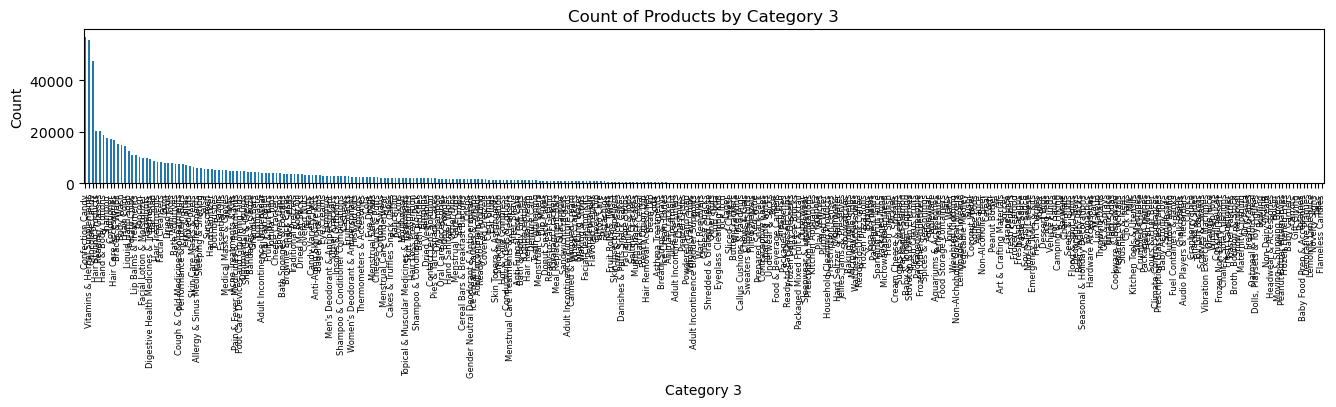

In [139]:
# Plot count of products by category_3
plt.figure(figsize=(16, 2))
products['CATEGORY_3'].value_counts().plot(kind='bar')
plt.xlabel('Category 3')
plt.ylabel('Count')
plt.title('Count of Products by Category 3')
# Change the font size of the x-axis labels
plt.xticks(fontsize=6)
plt.show()

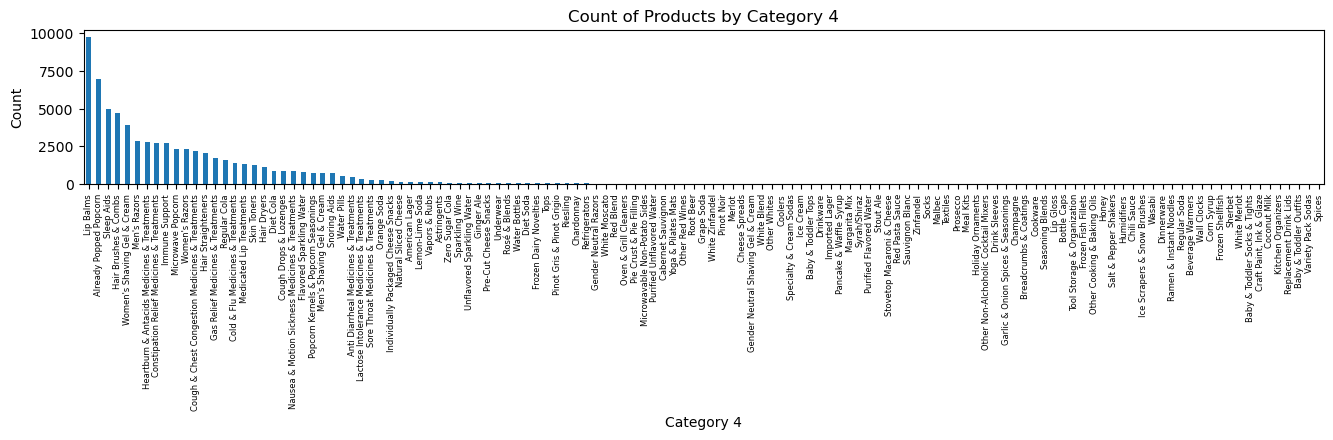

In [140]:
# Plot count of products by category_4
plt.figure(figsize=(16, 2))
products['CATEGORY_4'].value_counts().plot(kind='bar')
plt.xlabel('Category 4')
plt.ylabel('Count')
plt.title('Count of Products by Category 4')
# Change the font size of the x-axis labels
plt.xticks(fontsize=6)
plt.show()

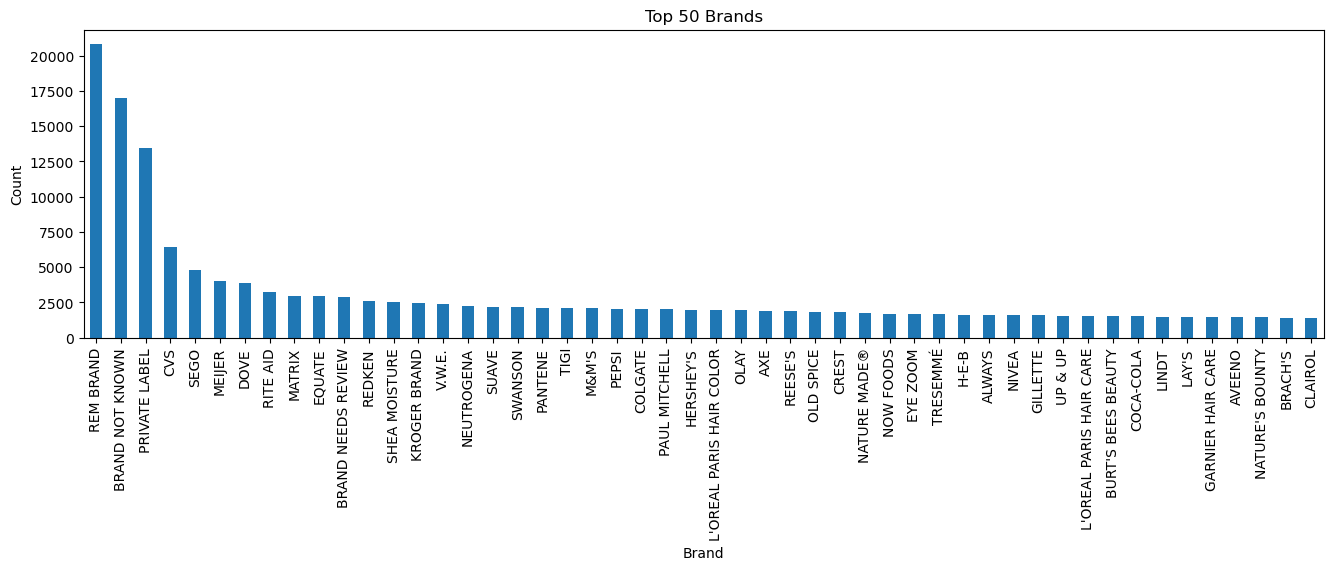

In [141]:
# Plot top 50 count of products by brand
plt.figure(figsize=(16, 4))
products['BRAND'].value_counts().head(50).plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 50 Brands')
plt.show()

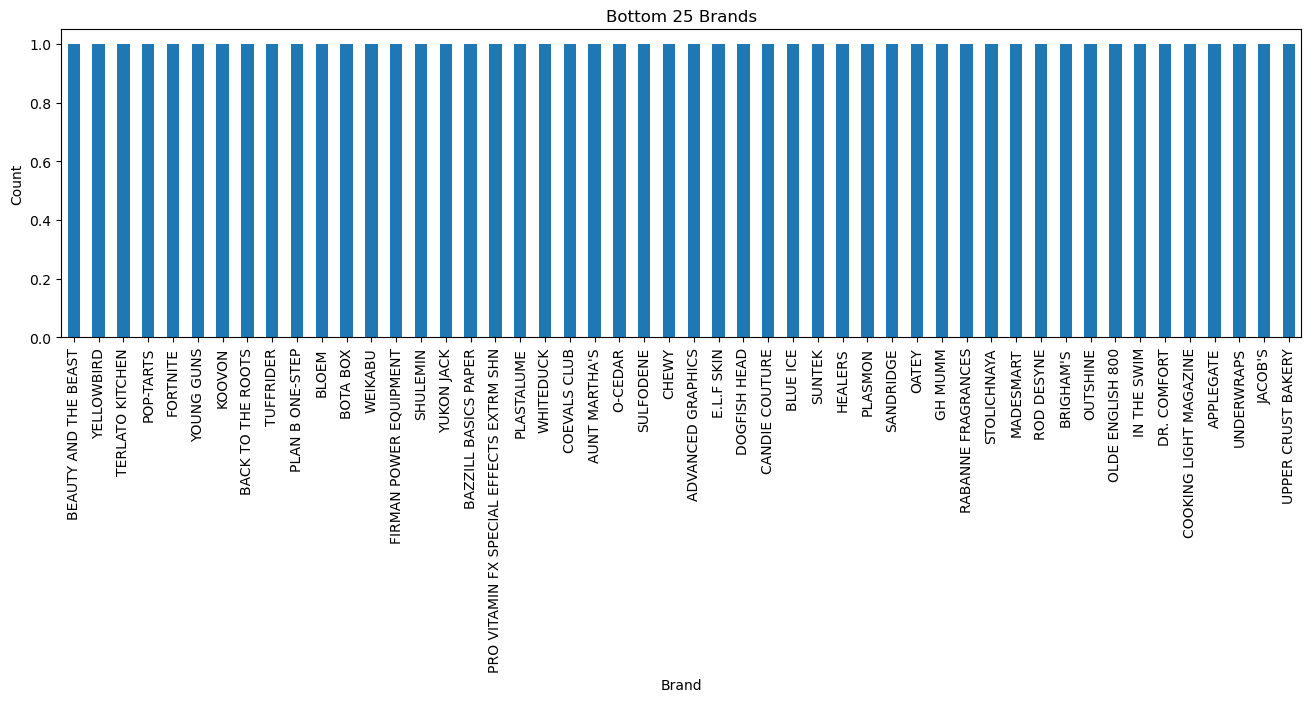

In [142]:
# Plot bottom 50 count of products by brand
plt.figure(figsize=(16, 4))
products['BRAND'].value_counts().tail(50).plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Bottom 25 Brands')
plt.show()

In [143]:
# Check the range of count by brand
products['BRAND'].value_counts().describe()

count     8122.000000
mean        76.197365
std        399.767167
min          1.000000
25%          3.000000
50%         12.000000
75%         47.000000
max      20813.000000
Name: count, dtype: float64

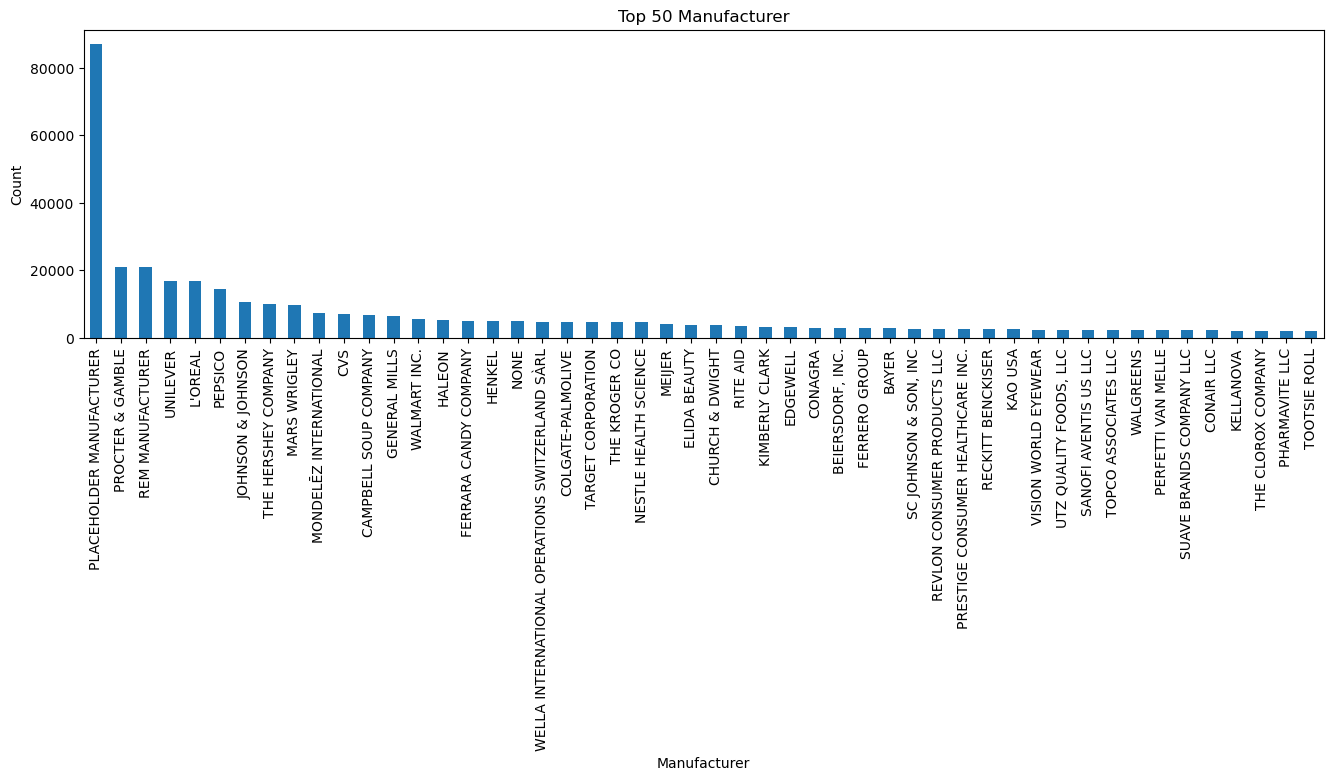

In [144]:
# Plot top 50 count of products by manufacturer
plt.figure(figsize=(16, 4))
products['MANUFACTURER'].value_counts().head(50).plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Top 50 Manufacturer')
plt.show()

In [145]:
# Checking for duplicated barcodes
products['BARCODE'].duplicated().sum()

3994

In [146]:
# List the duplicated barcodes order by barcode
products[products['BARCODE'].duplicated(keep=False)].sort_values('BARCODE').head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
428256,Health & Wellness,Skin Care,Facial Lotion & Moisturizer,NaN,"R.M. PALMER COMPANY, LLC",PALMER,1018158.0
123194,Health & Wellness,Skin Care,Lip Balms & Treatments,Medicated Lip Treatments,"E.T. BROWNE DRUG CO., INC.",PALMER'S SKIN & HAIR CARE,1018158.0
304021,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,GÖT2B,17000329260.0
213340,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,17000329260.0
783021,Snacks,Cookies,NaN,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,20031077.0


In [147]:
# Calculate missing brand
products['BRAND'].isnull().sum()

226462

In [148]:
# Check for missing values
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    845226 non-null  object
 1   CATEGORY_2    843915 non-null  object
 2   CATEGORY_3    784774 non-null  object
 3   CATEGORY_4    67453 non-null   object
 4   MANUFACTURER  618873 non-null  object
 5   BRAND         618875 non-null  object
 6   BARCODE       841369 non-null  object
dtypes: object(7)
memory usage: 51.6+ MB


In [150]:
# Check for NaN values
print(products['BARCODE'].isna().sum())

3968


In [151]:
# Check for infinite values
print((products['BARCODE'] == np.inf).sum() + (products['BARCODE'] == -np.inf).sum())

0


In [164]:
# Ensure column is numeric (convert strings if needed)
products['BARCODE'] = pd.to_numeric(products['BARCODE'], errors='coerce')

# Fill null values with -1 for better transforming and change the data type of barcode to integer to align with the ERD
products['BARCODE'] = products['BARCODE'].fillna(-1).astype(int)

# Change "-1" back to null and change the data type of barcode to nullable integer
products['BARCODE'] = products['BARCODE'].replace(-1, np.nan).astype("Int64")

# Check first 5 rows
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,,,,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,,,,23278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,,COLGATE-PALMOLIVE,COLGATE,35000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459


In [156]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    845226 non-null  object
 1   CATEGORY_2    843915 non-null  object
 2   CATEGORY_3    784774 non-null  object
 3   CATEGORY_4    67453 non-null   object
 4   MANUFACTURER  618873 non-null  object
 5   BRAND         618875 non-null  object
 6   BARCODE       841369 non-null  Int64 
dtypes: Int64(1), object(6)
memory usage: 52.4+ MB


In [157]:
# Check top 5 rows
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,23278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,35000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459


In [159]:
# Fill null values to columns that are object data type with empty string to fit SQLite3 database data type
columns_to_change = ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'BRAND', 'MANUFACTURER']
products[columns_to_change] = products[columns_to_change].fillna('')

In [160]:
# Save the products data to products_cleaned.csv
products.to_csv('../data/processed/products_cleaned.csv', index=False, header=True)

## Explore transactions

In [209]:
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [210]:
# Remove " Z" from end of date
transactions['SCAN_DATE'] = transactions['SCAN_DATE'].str.replace(' Z', '')

# Convert to datetime
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'])

# Convert purchase_date to datetime
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'], format='%Y-%m-%d')

# Checking the data
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


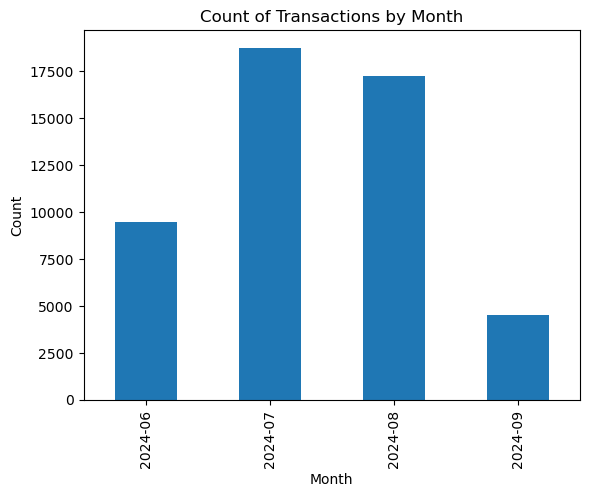

In [211]:
# Plot count of transactions by month
transactions['SCAN_DATE'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Transactions by Month')
plt.show()

In [212]:
# Check data types of transactions
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      50000 non-null  object        
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]
 2   SCAN_DATE       50000 non-null  datetime64[ns]
 3   STORE_NAME      50000 non-null  object        
 4   USER_ID         50000 non-null  object        
 5   BARCODE         44238 non-null  float64       
 6   FINAL_QUANTITY  50000 non-null  object        
 7   FINAL_SALE      50000 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 3.1+ MB


In [213]:
# Change "zero" in final_quantity to 0
transactions['FINAL_QUANTITY'] = transactions['FINAL_QUANTITY'].replace('zero', 0)

# Change data type of final_quantity to float
transactions['FINAL_QUANTITY'] = transactions['FINAL_QUANTITY'].astype(float)

# Checking the data
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,


In [214]:
# Checking the data with final_quantity is 0
transactions[transactions['FINAL_QUANTITY'] == 0.0].head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,0.0,3.49
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,0.0,1.46
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,0.0,3.59
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787,ALDI,66686fc2e04f743a096ea808,NaN,0.0,2.29


In [215]:
# Replace "" with np.nan
transactions['FINAL_SALE'] = transactions['FINAL_SALE'].replace('', np.nan)

# Fill missing values in final_sale with 0
transactions['FINAL_SALE'] = transactions['FINAL_SALE'].fillna(0)

# Change the data type of final_sale to float
transactions['FINAL_SALE'] = transactions['FINAL_SALE'].astype(float)

# Checking the data types
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      50000 non-null  object        
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]
 2   SCAN_DATE       50000 non-null  datetime64[ns]
 3   STORE_NAME      50000 non-null  object        
 4   USER_ID         50000 non-null  object        
 5   BARCODE         44238 non-null  float64       
 6   FINAL_QUANTITY  50000 non-null  float64       
 7   FINAL_SALE      50000 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 3.1+ MB


In [247]:
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,0.00
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,-1.000000e+00,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,0.00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,0.00


In [216]:
# Check if there are any rows with final_quantity is 0 and final_sale is also 0
transactions[(transactions['FINAL_QUANTITY'] == 0) & (transactions['FINAL_SALE'] == 0)].head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
301,0326a774-0077-4378-8828-a780057f21f9,2024-06-27,2024-06-28 01:22:17.313,KROGER,632940cbca87b39d76e1e3df,3.111119e+11,0.0,0.0
377,03f8cad3-bb8b-46e9-9cd1-854c29aa2221,2024-07-05,2024-07-07 00:28:26.074,WALGREENS,634104581aaccf0b2168d91e,NaN,0.0,0.0
673,06c39966-17c6-4e9f-bebe-d6da851f8f6a,2024-08-04,2024-08-09 09:58:37.189,KROGER,643439bf838dd2651fb34e16,5.111110e+11,0.0,0.0
899,091a401e-767c-4038-b26b-fedac0ebb7dd,2024-08-21,2024-08-28 19:06:34.410,WALMART,5ea3475c2244e612db5c63e6,5.084438e+10,0.0,0.0
1421,0e90d4f9-0ca9-4ab3-bd77-edc7d8d4be41,2024-07-11,2024-07-11 13:20:53.885,CVS,617ddad13b673b609e5f327b,NaN,0.0,0.0


In [217]:
# Check if there are any rows with final_quantity is not 0 and final_sale is also not 0
transactions[(transactions['FINAL_QUANTITY'] != 0) & (transactions['FINAL_SALE'] != 0)].head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25000,7b3ec72d-9d30-40b8-b185-0bfb638942a9,2024-08-20,2024-08-20 11:17:29.633,DOLLAR GENERAL STORE,60fc1e6deb7585430ff52ee7,7.455271e+11,1.0,1.65
25001,04869b68-29e3-4e8d-9bdb-950046fc3473,2024-08-05,2024-08-09 16:06:00.570,DOLLAR GENERAL STORE,654cf234a225ea102b81072e,7.455271e+11,1.0,1.65
25002,f1a96308-24a5-46a8-8d8c-285cf9dce1ba,2024-09-03,2024-09-03 11:28:25.264,WALMART,63c1cb6d3d310dceeac55487,3.700083e+10,1.0,28.22
25003,7ee1798e-fd2e-4278-838b-f417fdcafe08,2024-08-30,2024-09-04 12:53:31.478,DOLLAR GENERAL STORE,65c29b137050d0a6206cd24f,1.200050e+10,1.0,5.25
25004,21feab39-49f2-42e9-ae69-10371e2fc0a9,2024-08-23,2024-08-27 10:45:00.125,TARGET,61a58ac49c135b462ccddd1c,2.400039e+10,1.0,2.59


In [218]:
# Check rows with duplicated receipt_id
transactions[transactions['RECEIPT_ID'].duplicated(keep=False)].sort_values('RECEIPT_ID').head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,0.00
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,1.54
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,1.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,0.00


In [219]:
# Check rows with missing barcode ordered by receipt_id
transactions[transactions['BARCODE'].isnull()].sort_values('RECEIPT_ID').head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,1.0,1.49
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787,ALDI,66686fc2e04f743a096ea808,NaN,0.0,2.29
40976,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787,ALDI,66686fc2e04f743a096ea808,NaN,1.0,2.29
17,002ee298-d907-40ca-921a-556468571f76,2024-07-15,2024-07-16 16:42:19.211,ALDI,63de64b1dcb50fbd3084f142,NaN,0.0,2.49


In [220]:
# Fill null values in barcode with -1
transactions['BARCODE'] = transactions['BARCODE'].fillna(-1)

In [221]:
# Group by receipt_id, purchase_date, scan_date, store_name, user_id, barcode and aggregate final_quantity and final_sale by max (non-zero)
merged_transactions = transactions.groupby(
    ['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID', 'BARCODE']
).agg(
    final_quantity=('FINAL_QUANTITY', 'max'),
    final_sale=('FINAL_SALE', 'max')
).reset_index()

In [222]:
# Change -1 back to null
merged_transactions['BARCODE'] = merged_transactions['BARCODE'].replace(-1, np.nan)

In [223]:
merged_transactions[merged_transactions['BARCODE'].isnull()].head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,final_quantity,final_sale
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,1.0,1.49
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787,ALDI,66686fc2e04f743a096ea808,NaN,1.0,2.29
17,002ee298-d907-40ca-921a-556468571f76,2024-07-15,2024-07-16 16:42:19.211,ALDI,63de64b1dcb50fbd3084f142,NaN,1.0,2.49
18,00326689-e763-4b27-9ad5-202fc93609e2,2024-06-19,2024-06-20 08:59:38.397,ALDI,6158642597d737581b5d30ee,NaN,1.0,1.89
59,00a9e033-e49d-45d6-990e-90631f82775e,2024-09-05,2024-09-05 11:10:54.831,ALDI,5d4f08e962fb4a4a58574e7f,NaN,1.0,2.09


In [225]:
# Check for null values in barcode
merged_transactions['BARCODE'].isnull().sum()

2820

In [226]:
# Check if there are still rows with duplicated receipt_id and barcode
merged_transactions[['RECEIPT_ID', 'BARCODE']].duplicated().sum()

0

In [227]:
# Check for infinities in barcode
print((merged_transactions['BARCODE'] == np.inf).sum() + (merged_transactions['BARCODE'] == -np.inf).sum())

0


In [228]:
# Ensure column is numeric (convert strings if needed)
merged_transactions['BARCODE'] = pd.to_numeric(merged_transactions['BARCODE'], errors='coerce')

# Fill null values with -1 for better transforming and change the data type of barcode to integer to align with the ERD
merged_transactions['BARCODE'] = merged_transactions['BARCODE'].fillna(-1).astype(int)

# Change "-1" back to null
merged_transactions['BARCODE'] = merged_transactions['BARCODE'].replace(-1, np.nan)

# Change the data type of barcode to nullable integer
merged_transactions['BARCODE'] = merged_transactions['BARCODE'].astype("Int64")

# Check first 5 rows
merged_transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,final_quantity,final_sale
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.0,1.54
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,<NA>,1.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,78742229751,1.0,2.54
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,1.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.0,5.29


In [229]:
# Check the shape of merged_transactions
merged_transactions.shape

(24795, 8)

In [230]:
# Compare with the shape of transactions
transactions.shape

(50000, 8)

In [231]:
# Change ' ' in barcode to np.nan
merged_transactions['BARCODE'] = merged_transactions['BARCODE'].replace(' ', np.nan)

# Check for missing values in barcode
merged_transactions[merged_transactions['BARCODE'].isnull()].head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,final_quantity,final_sale
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,<NA>,1.0,1.49
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787,ALDI,66686fc2e04f743a096ea808,<NA>,1.0,2.29
17,002ee298-d907-40ca-921a-556468571f76,2024-07-15,2024-07-16 16:42:19.211,ALDI,63de64b1dcb50fbd3084f142,<NA>,1.0,2.49
18,00326689-e763-4b27-9ad5-202fc93609e2,2024-06-19,2024-06-20 08:59:38.397,ALDI,6158642597d737581b5d30ee,<NA>,1.0,1.89
59,00a9e033-e49d-45d6-990e-90631f82775e,2024-09-05,2024-09-05 11:10:54.831,ALDI,5d4f08e962fb4a4a58574e7f,<NA>,1.0,2.09


In [233]:
merged_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24795 entries, 0 to 24794
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      24795 non-null  object        
 1   PURCHASE_DATE   24795 non-null  datetime64[ns]
 2   SCAN_DATE       24795 non-null  datetime64[ns]
 3   STORE_NAME      24795 non-null  object        
 4   USER_ID         24795 non-null  object        
 5   BARCODE         21975 non-null  Int64         
 6   final_quantity  24795 non-null  float64       
 7   final_sale      24795 non-null  float64       
dtypes: Int64(1), datetime64[ns](2), float64(2), object(3)
memory usage: 1.5+ MB


In [240]:
# Check statistics of final_quantity, final_sale
merged_transactions[['final_quantity', 'final_sale']].describe()

,final_quantity,final_sale
count,24795.000000,24795.000000
mean,1.084271,4.583111
std,1.802640,6.539325
min,0.010000,0.000000
25%,1.000000,1.820000
50%,1.000000,3.000000
75%,1.000000,5.190000
max,276.000000,462.820000


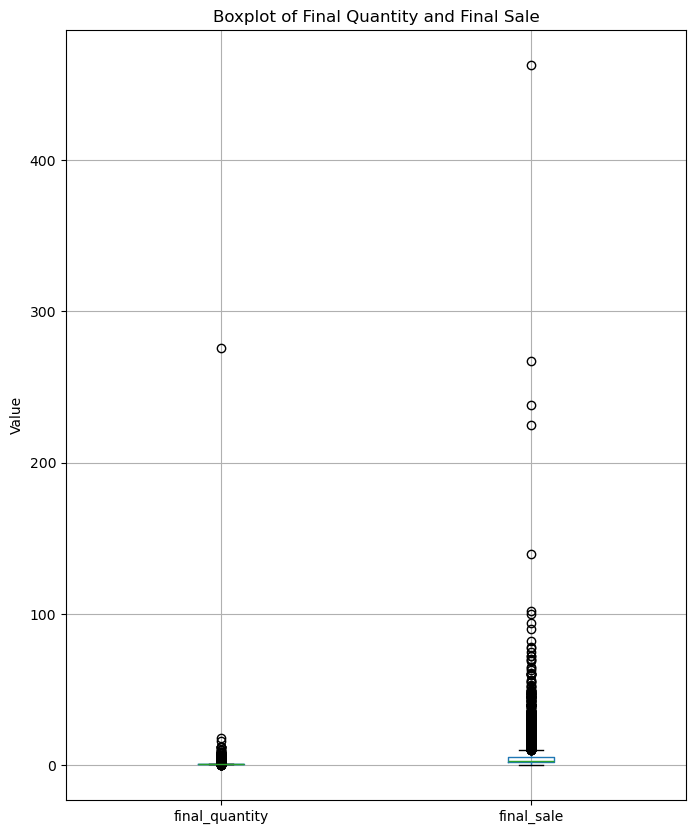

In [249]:
# Plot boxplot of final_quantity, final_sale
plt.figure(figsize=(8, 10))
merged_transactions[['final_quantity', 'final_sale']].boxplot()
plt.ylabel('Value')
plt.title('Boxplot of Final Quantity and Final Sale')
plt.show()

In [242]:
# Check the rows with maximum final_quantity
merged_transactions.loc[merged_transactions['final_quantity'].idxmax()]

RECEIPT_ID        fe0780d1-2d02-4822-8f12-7056b1814f17
PURCHASE_DATE                      2024-08-09 00:00:00
SCAN_DATE                   2024-08-11 17:52:18.523000
STORE_NAME                          MAIN STREET MARKET
USER_ID                       5d197f9dd08976510c49d0e6
BARCODE                                    48001353664
final_quantity                                   276.0
final_sale                                        5.89
Name: 24606, dtype: object

In [245]:
# Check the rows with final_quantity larger than 200
merged_transactions[merged_transactions['final_quantity'] > 200].head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,final_quantity,final_sale
24606,fe0780d1-2d02-4822-8f12-7056b1814f17,2024-08-09,2024-08-11 17:52:18.523,MAIN STREET MARKET,5d197f9dd08976510c49d0e6,48001353664,276.0,5.89


In [246]:
# Check the rows with final_quantity not with .0
merged_transactions[merged_transactions['final_quantity'] % 1 != 0].head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,final_quantity,final_sale
127,01592614-76c7-4a70-af8f-a8f33090d3f2,2024-07-16,2024-07-16 23:22:05.691,IGA,5ff4e5675a8ac51260da9495,311111172082,3.11,2.79
162,01a7d329-b995-4c76-8d74-41643000942b,2024-07-05,2024-07-05 10:04:43.841,WALMART,624aff6199e5162ba91c0f5b,895321002006,2.52,5.01
636,0674bb8d-d87c-4115-846d-b1d7d6f2ef8e,2024-09-08,2024-09-08 14:24:39.893,ALDI,63acb12201cb7c888c6f16f9,<NA>,3.02,2.89
656,06a1d65e-0751-481f-a54f-5cbdfa2d0df8,2024-07-29,2024-08-01 12:52:19.960,PUEBLO,665b575ce04f743a096ca7ea,311111937223,0.48,2.99
1364,0e1ac15e-3a8d-4941-97f5-4196b6ded496,2024-07-06,2024-07-07 10:50:29.137,IT'SUGAR,6183300cf998e47aad2d6f5d,768395518066,4.55,77.17


In [244]:
# Check the rows with maximum final_sale
merged_transactions.loc[merged_transactions['final_sale'].idxmax()]

RECEIPT_ID        8bbb09f6-aae6-47ae-88af-7cd46cc8079d
PURCHASE_DATE                      2024-07-06 00:00:00
SCAN_DATE                   2024-07-06 15:01:20.305000
STORE_NAME                                         CVS
USER_ID                       630789e1101ae272a4852287
BARCODE                                           <NA>
final_quantity                                     1.0
final_sale                                      462.82
Name: 13509, dtype: object

In [234]:
# Change null values in columns to empty string to fit SQLite3 database data type except for barcode
columns_to_change = merged_transactions.columns.difference(['BARCODE'])
merged_transactions[columns_to_change] = merged_transactions[columns_to_change].fillna('')

In [235]:
# Save the transactions data to transactions_cleaned.csv
merged_transactions.to_csv('../data/processed/transactions_cleaned.csv', index=False, header=True)

## Explore aggregated data

In [251]:
# Check the shape of merged_transactions
merged_transactions.shape

(24795, 8)

In [252]:
# Check the shape of users
users.shape

(100000, 6)

In [253]:
# Join users and transactions on user_id and check the shape
merged_transactions_users = merged_transactions.merge(users, left_on='USER_ID', right_on='ID', how='left')
merged_transactions_users.shape

(24795, 14)

In [254]:
# Check unique users in the merged_transactions_users
merged_transactions_users['USER_ID'].nunique()

17694

In [255]:
# Check the shape of products
products.shape

(845552, 7)

In [258]:
# Check the shape of merged_transactions
merged_transactions.shape

(24795, 8)

In [259]:
# Join products and merged_transactions on barcode and check the shape
merged_transactions_products = merged_transactions.merge(products, left_on='BARCODE', right_on='BARCODE', how='left')
merged_transactions_products.shape

(11372487, 14)

# Load Data to Database
Please download and install SQLite3, and then run ./load_data.sh to create database and load data to the database.

And then use the codes below to connect to the database and run sql in this notebook.

In [2]:
# Importing the libraries
import sqlite3

In [3]:
# Load the sql extension
%load_ext sql

In [4]:
# Load the database
%sql sqlite:///../data/fetch_data.db

# Provide SQL Querries

## Close-ended Questions

### What are the top 5 brands by receipts scanned among users 21 and over?
A: The top 5 brands by receipts scanned among users 21 and over would be:
- ANNIE'S HOMEGROWN GROCERY
- DOVE
- BAREFOOT
- ORIBE
- SHEA MOISTURE


In [5]:
%%sql
WITH receipt_count AS (
    SELECT
        user_id,
        barcode,
        -- Count the number of distinct receipt_id per user-product pair
        COUNT(DISTINCT receipt_id) AS receipt_count 
    FROM
        transactions
    WHERE
        scan_date IS NOT NULL
        AND barcode IS NOT NULL
        AND user_id IS NOT NULL
    GROUP BY
        user_id, barcode
)
SELECT
    p.brand,
    -- Sum the total receipt counts per brand
    SUM(r.receipt_count) AS total_receipts,
    -- Rank brands based on total_receipts
    RANK() OVER (ORDER BY SUM(r.receipt_count) DESC) AS rank
FROM
    products p
INNER JOIN receipt_count r
    ON p.barcode = r.barcode
INNER JOIN users u
    ON r.user_id = u.id
WHERE
    p.brand IS NOT NULL
    AND TRIM(p.brand) <> ''
    AND u.birth_date IS NOT NULL
    -- Ensure users are at least 21 years old
    AND (julianday('NOW') - julianday(u.birth_date) >= 21 * 365)
GROUP BY
    p.brand
ORDER BY
    rank
LIMIT 5;


 * sqlite:///../data/fetch_data.db
Done.


BRAND,total_receipts,rank
ANNIE'S HOMEGROWN GROCERY,264,1
DOVE,253,2
BAREFOOT,253,2
ORIBE,231,4
SHEA MOISTURE,220,5


### What are the top 5 brands by sales among users that have had their account for at least six months?
A: The top 5 brands by sales among users that have had their account for at least six month would be:
- ANNIE'S HOMEGROWN GROCERY
- BAREFOOT
- DOVE
- ORIBE
- AVEENO

In [6]:
%%sql
WITH brand_sales AS (
    SELECT
        p.brand,
        -- Sum the total sales for each brand
        ROUND(SUM(COALESCE(t.final_sale, 0)), 2) AS total_sales
    FROM
        transactions t
    INNER JOIN products p
        ON t.barcode = p.barcode
    INNER JOIN users u
        ON t.user_id = u.id
    WHERE
        p.brand IS NOT NULL
        AND TRIM(p.brand) <> ''
        AND u.created_date IS NOT NULL
        -- Filter for users with accounts at least 6 months old
        AND (julianday('NOW') - julianday(u.created_date) >= 182.5)
    GROUP BY
        p.brand
)
SELECT 
    brand,
    total_sales,
    RANK() OVER (ORDER BY total_sales DESC) AS rank
FROM 
    brand_sales
WHERE 
    total_sales > 0
ORDER BY 
    rank
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


brand,total_sales,rank
ANNIE'S HOMEGROWN GROCERY,1481.28,1
BAREFOOT,1419.56,2
DOVE,1419.56,2
ORIBE,1296.12,4
AVEENO,1234.4,5


### What is the percentage of sales in the Health & Wellness category by generation?
A: Assume that the generations are defined as:
- The Greatest Generation: Born 1901–1927
- The Silent Generation: Born 1928–1945
- Generation X: Born 1965–1980
- Millennials: Born 1981–1996
- Generation Z: Born 1997–2012
- Generation Alpha: Born 2013–2024
- Generation Beta: Born 2025–2039

The percentage of sales would be:
|Generation  | Percentage of Sales |
|------------|---------------------|
|Millennial  | 55.78%              |
|Baby Boomer | 24.81%              |
|Gen X       | 19.41%              |

In [7]:
%%sql
WITH category_sales AS (
    SELECT
        user_id,
        SUM(COALESCE(final_sale, 0)) AS total_sales
    FROM
        transactions t
    JOIN products p
        ON t.barcode = p.barcode
    WHERE
        p.category_1 = 'Health & Wellness'
    GROUP BY
        user_id
),
generation_sales AS (
    SELECT
        CASE
            WHEN birth_date BETWEEN '1901-01-01' AND '1927-12-31' THEN 'Greatest Generation'
            WHEN birth_date BETWEEN '1928-01-01' AND '1945-12-31' THEN 'Silent Generation'
            WHEN birth_date BETWEEN '1946-01-01' AND '1964-12-31' THEN 'Baby Boomer'
            WHEN birth_date BETWEEN '1965-01-01' AND '1980-12-31' THEN 'Gen X'
            WHEN birth_date BETWEEN '1981-01-01' AND '1996-12-31' THEN 'Millennial'
            WHEN birth_date BETWEEN '1997-01-01' AND '2012-12-31' THEN 'Gen Z'
            WHEN birth_date BETWEEN '2013-01-01' AND '2024-12-31' THEN 'Alpha'
            WHEN birth_date BETWEEN '2025-01-01' AND '2039-12-31' THEN 'Beta'
            ELSE 'Unknown'
        END AS generation,
        SUM(COALESCE(cs.total_sales, 0)) AS total_sales
    FROM
        users u
    JOIN category_sales cs
        ON u.id = cs.user_id
    WHERE
        u.birth_date IS NOT NULL
    GROUP BY 
        generation
),
total_sales AS (
    SELECT SUM(COALESCE(total_sales, 0)) AS grand_total FROM generation_sales
)
SELECT 
    g.generation,
    ROUND((g.total_sales * 100.0) / t.grand_total, 2) AS percentage_of_total_sales
FROM 
    generation_sales g
CROSS JOIN 
    total_sales t
ORDER BY 
    2 DESC;

 * sqlite:///../data/fetch_data.db
Done.


generation,percentage_of_total_sales
Millennial,55.78
Baby Boomer,24.81
Gen X,19.41


## Open-ended questions: for these, make assumptions and clearly state them when answering the question.

### Who are Fetch’s power users?

A: I list 5 power users based on self-defined metrics:

| user_id                  | user_power_score |
|--------------------------|------------------|
| 64e62de5ca929250373e6cf5 | 0.6              |
| 63d97d69b425eb11a4709d56 | 0.45             |
| 63dad1d9dcb50fbd3082d53c | 0.45             |
| 630789e1101ae272a4852287 | 0.35             |
| 6495efa3127ddb5d7fffbee9 | 0.3              |

#### Metric 1: Total receipt count
This metric represents the engagement of the user. More receipts = More data points = More valuable for business insights.

In [35]:
%%sql
SELECT
    t.user_id,
    COUNT(DISTINCT t.receipt_id) AS total_receipts
FROM transactions t
LEFT JOIN users u
    ON t.user_id = u.id
WHERE t.user_id IS NOT NULL
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;


 * sqlite:///../data/fetch_data.db
Done.


USER_ID,total_receipts
64e62de5ca929250373e6cf5,10
62925c1be942f00613f7365e,10
64063c8880552327897186a5,9
6327a07aca87b39d76e03864,7
624dca0770c07012cd5e6c03,7


#### Metric 2: Total Spent Per Receipt
This metric suggests higher spending behavior of the user. These types of users are relatively rare and the data they provide would be valuable.

In [34]:
%%sql
SELECT 
    user_id, 
    SUM(final_sale) / COUNT(DISTINCT receipt_id) AS total_spent_per_receipt
FROM transactions
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


USER_ID,total_spent_per_receipt
630789e1101ae272a4852287,462.82
650874eafe41d365c2ee11d2,267.29
63af23db9f3fc9c7546fdbec,238.17
6475fd16a55bb77a0e279ee0,77.8
64e026394a487a081bd8d5d0,74.99


#### Metric 3: Brand Diversity
A user who purchases multiple brands provides broader insights and thus valuable.

(In this case, the data exhibits a consistent pattern, which could indicate a potential error.)

In [9]:
%%sql
SELECT 
    t.user_id, 
    COUNT(DISTINCT p.brand) AS unique_brands
FROM transactions t
JOIN products p ON t.barcode = p.barcode
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


USER_ID,unique_brands
6682d2da86cc41b000ce639c,770
66821c43465f309038ae0982,770
6681db52465f309038adf861,770
66815d6686cc41b000ce2134,770
6680bd2986cc41b000ce1494,770


#### Metric 4: Active Period
This metrics evaluate the loyalty of the user.

(In this case, the data exhibits a consistent pattern, which could indicate a potential error.)

In [ ]:
%%sql
SELECT 
    user_id, 
    COUNT(DISTINCT strftime('%Y-%m', scan_date)) AS active_months
FROM transactions
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


USER_ID,active_months
666a2e417c0469953bfd9656,4
65bfa5dbe43f8851491ca8dd,4
655d0bed50f017da4e46566b,4
6556e840a225ea102b82454c,4
653ec447a225ea102b7f0846,4


#### Metric 5: Store Variety
Multi-store shoppers reveal store competition trends for business partners.

In [54]:
%%sql
SELECT 
    user_id, 
    COUNT(DISTINCT store_name) AS unique_stores
FROM transactions
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


USER_ID,unique_stores
65cd1a2816cc391732119c3a,5
6345dbb11aaccf0b216cea6b,5
5d48752bb292771a74207fa4,5
6658b5b17c0469953bfad970,4
65f5de7b96ce12ad907a3860,4


#### Calculate weighted metric for evaluating power
I used this table to calculate user power:

| Normalized Metric       | Weight |
|-------------------------|--------|
| Total Receipt Count     | 30%    |
| Total Spent Per Receipt | 25%    |
| Brand Diversity         | 10%    |
| Active Period           | 20%    |
| Store Variety           | 15%    |
| Total                   | 100%   |

In [29]:
%%sql
WITH total_receipts AS (
    SELECT
        user_id,
        COUNT(DISTINCT receipt_id) AS total_receipts
    FROM transactions
    GROUP BY user_id
),

total_spent_per_receipt AS (
    SELECT
        user_id,
        SUM(final_sale) / COUNT(DISTINCT receipt_id) AS total_spent_per_receipt
    FROM transactions
    GROUP BY user_id
),

unique_brands AS (
    SELECT
        t.user_id,
        COUNT(DISTINCT p.brand) AS unique_brands
    FROM transactions t
    JOIN products p ON t.barcode = p.barcode
    GROUP BY t.user_id
),

active_months AS (
    SELECT
        user_id,
        COUNT(DISTINCT strftime('%Y-%m', scan_date)) AS active_months
    FROM transactions
    GROUP BY user_id
),

unique_stores AS (
    SELECT
        user_id,
        COUNT(DISTINCT store_name) AS unique_stores
    FROM transactions
    GROUP BY user_id
),

metric_ranges AS (
    SELECT
        MAX(tr.total_receipts) - MIN(tr.total_receipts) AS range_total_receipts,
        MAX(tspr.total_spent_per_receipt) - MIN(tspr.total_spent_per_receipt) AS range_total_spent_per_receipt,
        MAX(ub.unique_brands) - MIN(ub.unique_brands) AS range_unique_brands,
        MAX(am.active_months) - MIN(am.active_months) AS range_active_months,
        MAX(us.unique_stores) - MIN(us.unique_stores) AS range_unique_stores
    FROM total_receipts tr
    JOIN total_spent_per_receipt tspr ON tr.user_id = tspr.user_id
    JOIN unique_brands ub ON tr.user_id = ub.user_id
    JOIN active_months am ON tr.user_id = am.user_id
    JOIN unique_stores us ON tr.user_id = us.user_id
),

normalized_metrics AS (
    SELECT
        tr.user_id,
        tr.total_receipts / NULLIF(mr.range_total_receipts, 0) AS normalized_total_receipts,
        tspr.total_spent_per_receipt / NULLIF(mr.range_total_spent_per_receipt, 0) AS normalized_total_spent_per_receipt,
        ub.unique_brands / NULLIF(mr.range_unique_brands, 0) AS normalized_unique_brands,
        am.active_months / NULLIF(mr.range_active_months, 0) AS normalized_active_months,
        us.unique_stores / NULLIF(mr.range_unique_stores, 0) AS normalized_unique_stores
    FROM total_receipts tr
    JOIN total_spent_per_receipt tspr ON tr.user_id = tspr.user_id
    JOIN unique_brands ub ON tr.user_id = ub.user_id
    JOIN active_months am ON tr.user_id = am.user_id
    JOIN unique_stores us ON tr.user_id = us.user_id
    CROSS JOIN metric_ranges mr
)

SELECT
    user_id,
    ROUND(
        normalized_total_receipts * 0.3 +
        normalized_total_spent_per_receipt * 0.25 +
        normalized_unique_brands * 0.1 +
        normalized_active_months * 0.2 +
        normalized_unique_stores * 0.15, 2
    ) AS user_power_score
FROM normalized_metrics
ORDER BY user_power_score DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


user_id,user_power_score
64e62de5ca929250373e6cf5,0.6
61545c3b504f3536dc3423b6,0.46
5dfc40157bfa801226bde4fc,0.45
5f96fd5855f095164febccb1,0.45
602fd66ad039b712eaa18cf6,0.45


### Which is the leading brand in the Dips & Salsa category?

#### Metric 1: Total Sales
This metric describes the product positioning and the popularity.

In [62]:
%%sql
SELECT
    p.brand,
    SUM(t.final_sale) AS total_sales
FROM transactions t
JOIN products p ON t.barcode = p.barcode
WHERE p.category_2 = 'Dips & Salsa'
    AND p.brand IS NOT NULL
    AND TRIM(p.brand) <> ''
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


BRAND,total_sales
TOSTITOS,69062.15
OLD EL PASO,55249.72
FRITOS,55249.72
FRESH CRAVINGS,55249.72
WHOLLY,41437.29


#### Metric 2: Total Quantity
This metric is more focused on popularity compared to the total sales.

In [64]:
%%sql
SELECT
    p.brand,
    SUM(t.final_quantity) AS total_quantities
FROM transactions t
JOIN products p ON t.barcode = p.barcode
WHERE p.category_2 = 'Dips & Salsa'
    AND p.brand IS NOT NULL
    AND TRIM(p.brand) <> ''
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


BRAND,total_quantities
TOSTITOS,15186.75
OLD EL PASO,12149.4
FRITOS,12149.4
FRESH CRAVINGS,12149.4
WHOLLY,9112.05


#### Metric 3: Total User
A brand with more users should be more powerful.

(In this case, the data exhibits a consistent pattern, which could indicate a potential error.)

In [66]:
%%sql
SELECT
    p.brand,
    COUNT(DISTINCT t.user_id) AS total_users
FROM transactions t
JOIN products p ON t.barcode = p.barcode
WHERE p.category_2 = 'Dips & Salsa'
    AND p.brand IS NOT NULL
    AND TRIM(p.brand) <> ''
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


BRAND,total_users
WHOLLY,2594
VELVEETA,2594
TOSTITOS,2594
SABRITAS,2594
RUFFLES,2594


#### Metric 4: Total Frequent User
This metrics describes the user loyalty of the brand.

(In this case, the data exhibits a consistent pattern, which could indicate a potential error.)

In [15]:
%%sql
WITH user_purchases AS (
    SELECT
        t.user_id,
        t.barcode,
        COUNT(DISTINCT t.receipt_id) AS total_receipts  -- Count distinct receipts, not brands
    FROM transactions t
    JOIN products p ON t.barcode = p.barcode
    WHERE p.category_2 = 'Dips & Salsa'
        AND p.brand IS NOT NULL
        AND TRIM(p.brand) <> ''
    GROUP BY 1, 2
)
SELECT
    p.brand,
    COUNT(DISTINCT up.user_id) AS total_users
FROM user_purchases up
JOIN products p ON up.barcode = p.barcode
WHERE p.category_2 = 'Dips & Salsa'
    AND p.brand IS NOT NULL
    AND TRIM(p.brand) <> ''
    AND up.total_receipts > 5  -- Ensure users have more than 5 receipts
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


BRAND,total_users
WHOLLY,2
VELVEETA,2
TOSTITOS,2
SABRITAS,2
RUFFLES,2


#### Metric 5: Total User States
This metric describes how broad the brand covers geographically.

(In this case, the data exhibits a consistent pattern, which could indicate a potential error.)

In [16]:
%%sql
SELECT
    p.brand,
    COUNT(DISTINCT u.state) AS total_states
FROM transactions t
JOIN products p ON t.barcode = p.barcode
JOIN users u ON t.user_id = u.id
WHERE p.category_2 = 'Dips & Salsa'
    AND p.brand IS NOT NULL
    AND TRIM(p.brand) <> ''
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


BRAND,total_states
WHOLLY,10
VELVEETA,10
TOSTITOS,10
SABRITAS,10
RUFFLES,10


#### Calculate weighted metric for leading brand
I used this table to calculate user power:

| Normalized Metric   | Weight |
|---------------------|--------|
| Total Sales         | 10%    |
| Total Quantity      | 25%    |
| Total User          | 25%    |
| Total Frequent User | 20%    |
| Total User States   | 20%    |
| Total               | 100%   |

(In this case, the data exhibits a consistent pattern, which could indicate a potential error.)

In [35]:
%%sql
WITH user_purchases AS (
    SELECT
        t.user_id,
        t.barcode,
        COUNT(DISTINCT t.receipt_id) AS total_receipts
    FROM transactions t
    JOIN products p ON t.barcode = p.barcode
    WHERE p.category_2 = 'Dips & Salsa'
        AND p.brand IS NOT NULL
        AND TRIM(p.brand) <> ''
    GROUP BY 1, 2
),

sales_metrics AS (
    SELECT
        p.brand,
        SUM(COALESCE(t.final_sale, 0)) AS total_sales
    FROM transactions t
    JOIN products p ON t.barcode = p.barcode
    WHERE p.category_2 = 'Dips & Salsa'
        AND p.brand IS NOT NULL
        AND TRIM(p.brand) <> ''
    GROUP BY 1
),

quantity_metrics AS (
    SELECT
        p.brand,
        SUM(COALESCE(t.final_quantity, 0)) AS total_quantities
    FROM transactions t
    JOIN products p ON t.barcode = p.barcode
    WHERE p.category_2 = 'Dips & Salsa'
        AND p.brand IS NOT NULL
        AND TRIM(p.brand) <> ''
    GROUP BY 1
),

user_metrics AS (
    SELECT
        p.brand,
        COUNT(DISTINCT t.user_id) AS total_users
    FROM transactions t
    JOIN products p ON t.barcode = p.barcode
    WHERE p.category_2 = 'Dips & Salsa'
        AND p.brand IS NOT NULL
        AND TRIM(p.brand) <> ''
    GROUP BY 1 
),

frequent_user_metrics AS (
    SELECT
        p.brand,
        COUNT(DISTINCT up.user_id) AS total_frequent_users
    FROM user_purchases up
    JOIN products p ON up.barcode = p.barcode
    WHERE p.category_2 = 'Dips & Salsa'
        AND p.brand IS NOT NULL
        AND TRIM(p.brand) <> ''
        AND up.total_receipts > 5  -- Ensure users have more than 5 receipts
    GROUP BY 1
),

state_metrics AS (
    SELECT
        p.brand,
        COUNT(DISTINCT u.state) AS total_states
    FROM transactions t
    JOIN products p ON t.barcode = p.barcode
    JOIN users u ON t.user_id = u.id
    WHERE p.category_2 = 'Dips & Salsa'
        AND p.brand IS NOT NULL
        AND TRIM(p.brand) <> ''
    GROUP BY 1
),

metric_ranges AS (
    SELECT
        MAX(total_sales) - MIN(total_sales) + 0.1 AS range_total_sales,
        MAX(total_quantities) - MIN(total_quantities) + 0.1 AS range_total_quantities,
        MAX(total_users) - MIN(total_users) + 0.1 AS range_total_users,
        MAX(total_frequent_users) - MIN(total_frequent_users) + 0.1 AS range_total_frequent_users,
        MAX(total_states) - MIN(total_states) + 0.1 AS range_total_states
    FROM (
        SELECT 
            sm.total_sales,
            qm.total_quantities,
            um.total_users,
            fum.total_frequent_users,
            stm.total_states
        FROM sales_metrics sm
        JOIN quantity_metrics qm ON sm.brand = qm.brand
        JOIN user_metrics um ON sm.brand = um.brand
        JOIN frequent_user_metrics fum ON sm.brand = fum.brand
        JOIN state_metrics stm ON sm.brand = stm.brand
    )
),

normalized_metrics AS (
    SELECT
        sm.brand,
        sm.total_sales / mr.range_total_sales AS normalized_total_sales,
        qm.total_quantities / mr.range_total_quantities AS normalized_total_quantities,
        um.total_users / mr.range_total_users AS normalized_total_users,
        fum.total_frequent_users / mr.range_total_frequent_users AS normalized_total_frequent_users,
        stm.total_states / mr.range_total_states AS normalized_total_states
    FROM sales_metrics sm
    JOIN quantity_metrics qm ON sm.brand = qm.brand
    JOIN user_metrics um ON sm.brand = um.brand
    JOIN frequent_user_metrics fum ON sm.brand = fum.brand
    JOIN state_metrics stm ON sm.brand = stm.brand
    CROSS JOIN metric_ranges mr
)

SELECT
    brand,
    normalized_total_sales * 0.1 +
    normalized_total_quantities * 0.25 +
    normalized_total_users * 0.25 +
    normalized_total_frequent_users * 0.2 +
    normalized_total_states * 0.2 AS brand_power_score
FROM normalized_metrics
ORDER BY brand_power_score DESC
LIMIT 5;

 * sqlite:///../data/fetch_data.db
Done.


brand,brand_power_score
TOSTITOS,6509.583328358471
FRESH CRAVINGS,6509.4666626867765
FRITOS,6509.4666626867765
OLD EL PASO,6509.4666626867765
ATHENOS,6509.349997015082


### At what percent has Fetch grown year over year?

#### Metric 1: User Count

Registered user growth is extremely important for a startup company. The more users, the more amount of data can be collected for business partners.

In [28]:
%%sql
WITH user_account_counts AS (
    SELECT
        COUNT(DISTINCT id) AS total_users,
        CAST(strftime('%Y', created_date) AS INTEGER) AS account_created_year
    FROM users
    WHERE created_date IS NOT NULL
    GROUP BY 2
)
SELECT
    uac1.account_created_year,
    ROUND(100.0 * uac1.total_users / NULLIF(uac2.total_users, 0) - 1, 2) AS yoy_growth_rate
FROM user_account_counts uac1
JOIN user_account_counts uac2
    ON uac1.account_created_year = uac2.account_created_year + 1
ORDER BY 1;

 * sqlite:///../data/fetch_data.db
Done.


account_created_year,yoy_growth_rate
2015,169.0
2016,136.25
2017,919.0
2018,335.65
2019,326.17
2020,237.02
2021,112.48
2022,138.92
2023,56.69
2024,74.21


#### Metric 2: Receipt Count
The more receipts scanned, the more data collected.

(In this case, only 2024 transaction records were collected in the transactions dataset so there's no output.)

In [29]:
%%sql
WITH receipt_counts AS (
    SELECT
        COUNT(DISTINCT receipt_id) AS total_receipts,
        CAST(strftime('%Y', scan_date) AS INTEGER) AS receipt_scan_year
    FROM transactions
    GROUP BY 2
)
SELECT
    rc1.receipt_scan_year,
    ROUND(100.0 * rc1.total_receipts / NULLIF(rc2.total_receipts, 0) - 1, 2) AS yoy_growth_rate
FROM receipt_counts rc1
JOIN receipt_counts rc2
    ON rc1.receipt_scan_year = rc2.receipt_scan_year + 1
ORDER BY 1 DESC;

 * sqlite:///../data/fetch_data.db
Done.


receipt_scan_year,yoy_growth_rate


Since the second metrics can't be collected from the existing dataset, I would use the first metric to evaluate the company growth directly.

| Account Created Year | YoY Growth Rate |
|----------------------|-----------------|
| 2015                 | 169.0%          |
| 2016                 | 136.25%         |
| 2017                 | 919.0%          |
| 2018                 | 335.65%         |
| 2019                 | 326.17%         |
| 2020                 | 237.02%         |
| 2021                 | 112.48%         |
| 2022                 | 138.92%         |
| 2023                 | 56.69%          |
| 2024                 | 74.21%          |


Based on the YoY Growth data on user count, we can summarize that there are four stages of the APP development:
1. Early Stage (2015-2016) – Initial Traction but Slowing Growth
2. Breakthrough & Rapid Expansion (2017-2019) – App Launch Boost
3. Maturity & Growth Plateau (2020-2022) – Slowing Expansion
4. Recent Struggles (2023-2024) – Growth Decline